# Интеграл

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'y = $\\sqrt{x-1}$')

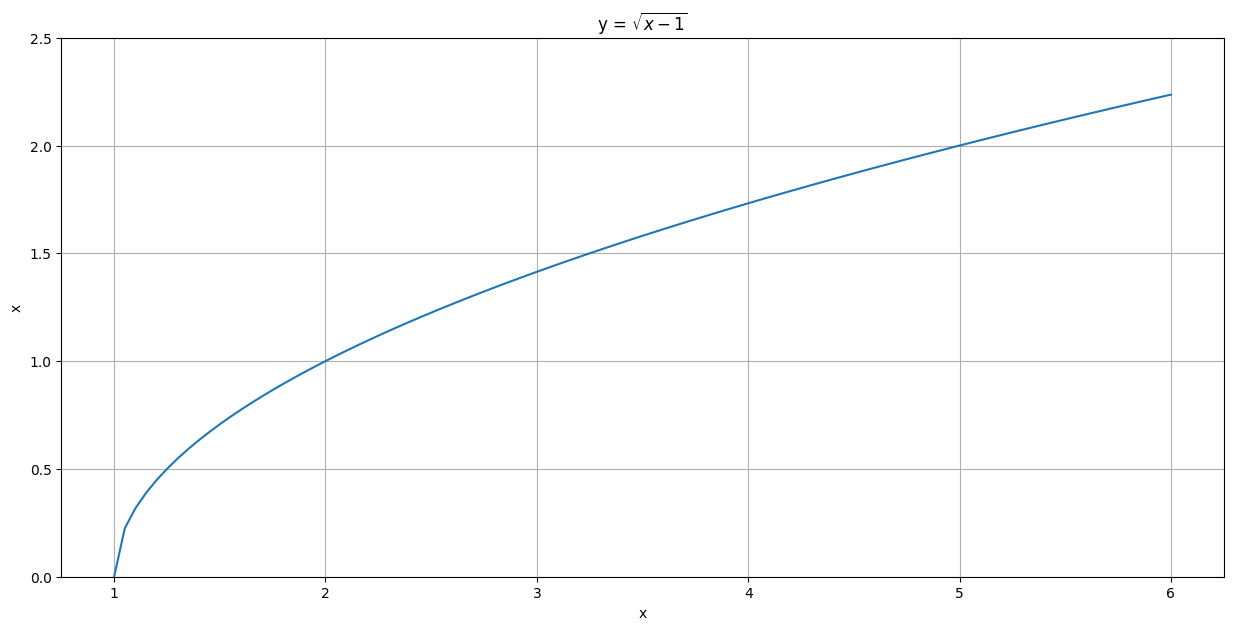

In [2]:
x = np.linspace(1, 6, 100)
y = np.sqrt(x-1)

plt.figure(figsize=(15, 7))
plt.grid()
plt.plot(x, y)
plt.ylim(0, 2.5)
plt.xlabel("x")
plt.ylabel("x")
plt.title("y = $\sqrt{x-1}$")

# $\int_1^6 \sqrt{x-1}$ = $\int_1^6 (x-1)^{\frac{1}{2}}$ = $\frac{2}{3} (x-1) ^ {\frac{3}{2}} |_1^6 $ = 

# = $\frac{2}{3} (6-1)^{\frac{3}{2}} - \frac{2}{3} (1-1)^{\frac{3}{2}}$ = $\frac{2}{3} (5)^{\frac{3}{2}} = 7.45355$

In [10]:
2/3*(6-1)**(3/2) - 2/3*(1-1)**(3/2)

7.453559924999299

## Метод трапеции

<img src="./integral_diff_eq/10.png" alt="Alternative text"/>

In [3]:
def trapezia_method_plot(interval_count: int):
    x = np.linspace(1, 6, 100)
    x_points = np.linspace(1, 6, interval_count+1)
    y = np.sqrt(x-1)
    y_points = np.sqrt(x_points - 1)

    plt.figure(figsize=(15, 5))
    plt.grid()
    plt.plot(x,y)
    plt.plot(x_points, y_points)
    for i in x_points:
        plt.vlines(i, 0, np.sqrt(i-1), color='orange')
    plt.ylim(0, 2.5)
    plt.xlabel("x")
    plt.ylabel("x")
    plt.title("y = $\sqrt{x-1}$")

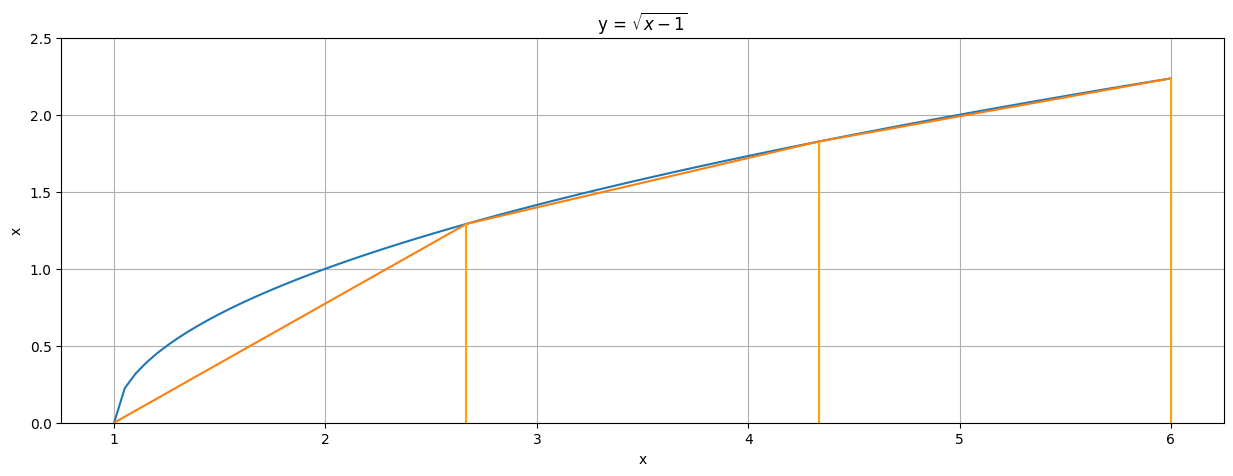

In [4]:
trapezia_method_plot(3)

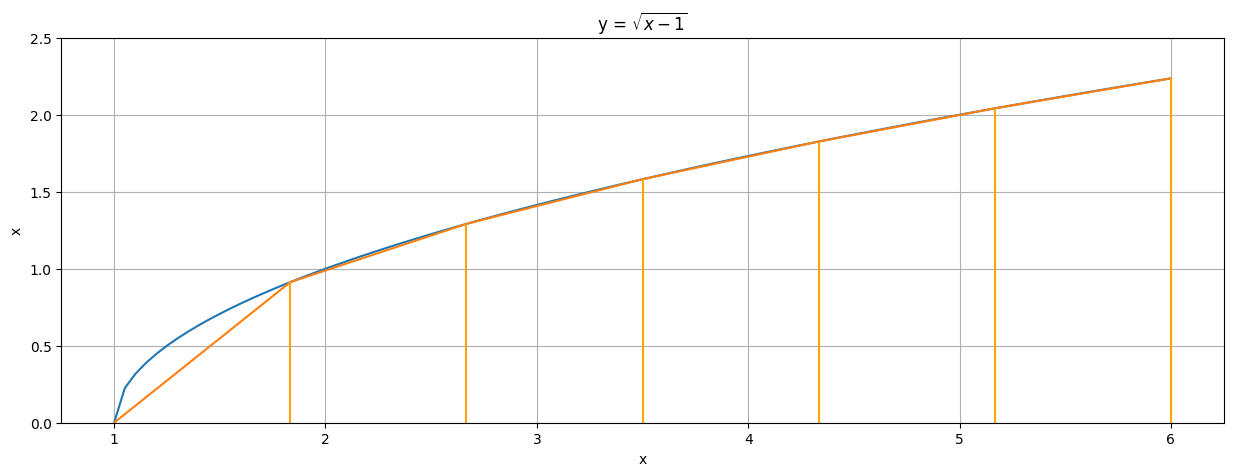

In [5]:
trapezia_method_plot(6)

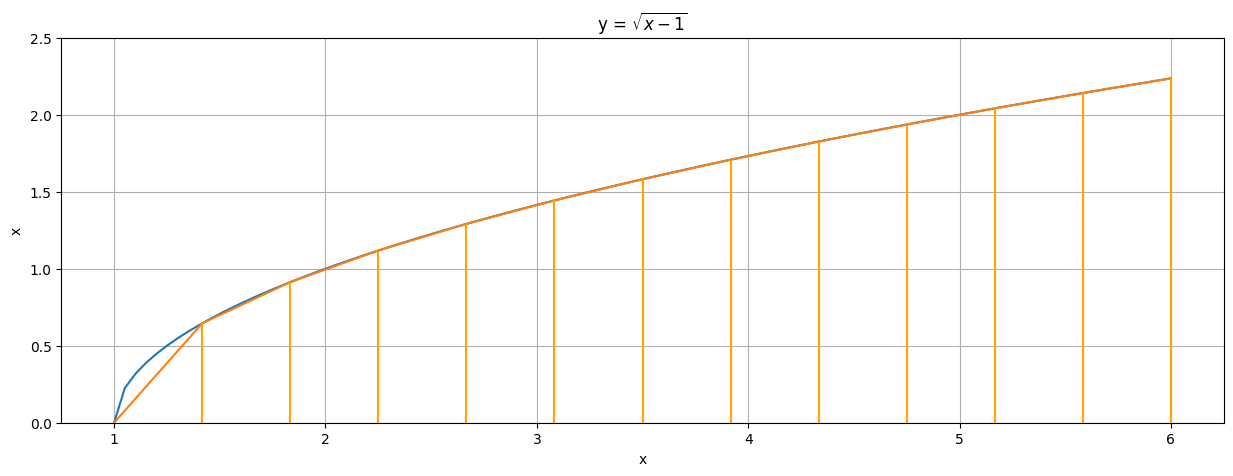

In [6]:
trapezia_method_plot(12)

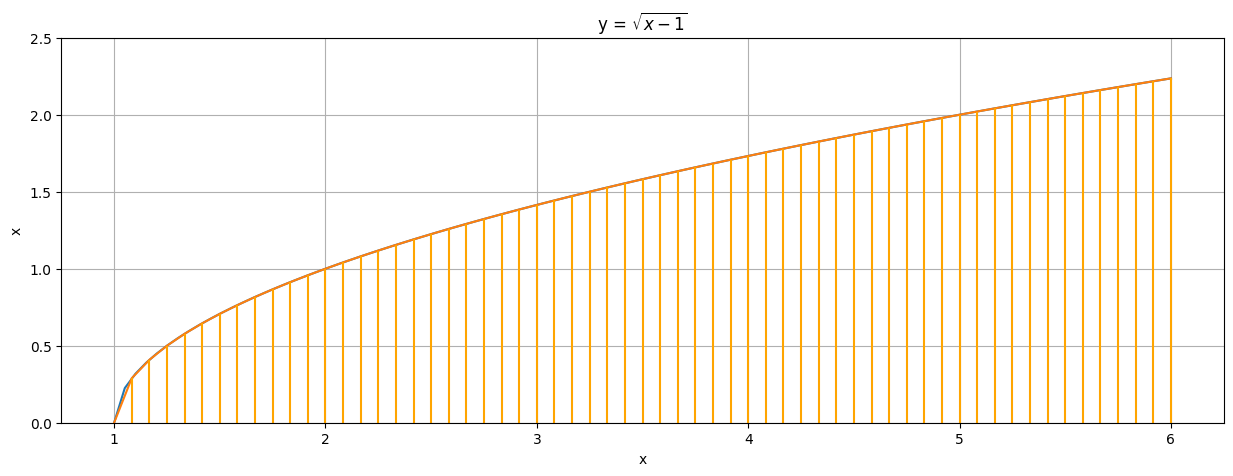

In [7]:
trapezia_method_plot(60)

In [8]:
def trapezia_integral(interval_count: int):
    x_points = np.linspace(1, 6, interval_count+1)
    y_points = np.sqrt(x_points - 1)

    delta_x = (6-1) / (x_points.shape[0] - 1)
    print(f"delta_x: {delta_x}")

    integral = 0
    for ix, y in enumerate(y_points[:-1]):
        integral += (y + y_points[ix+1])/2 * delta_x
    print(f"integral: {integral}")

In [9]:
trapezia_integral(5)

delta_x: 1.0
integral: 7.2642983586918675


In [11]:
trapezia_integral(10)

delta_x: 0.5
integral: 7.384718939150402


In [12]:
trapezia_integral(100)

delta_x: 0.05
integral: 7.451282271037425


In [13]:
trapezia_integral(500)

delta_x: 0.01
integral: 7.453353902164204


## Метод Симпсона (метод параболы)

<img src="./integral_diff_eq/9.png" alt="Alternative text" />

In [ ]:
a*x^2 + bx + c = y

In [14]:
def simplson_method_plot(interval_count: int):
    x_points = np.linspace(1, 6, interval_count+1)
    y_points = np.sqrt(x_points - 1)

    f_x = lambda x: np.sqrt(x - 1)

    parab_xs = None
    parab_ys = None

    for ix, x in enumerate(x_points[:-1]):

        # по трем точкам строим систему линейных уравнений. 
        # Решением этот СЛАУ будут коэффициенты квадратного уравнения
        A = []
        Y = []

        mid = (x_points[ix+1] + x)/2

        A.append([x**2, x, 1])
        A.append([mid**2, mid, 1])
        A.append([x_points[ix+1]**2, x_points[ix+1], 1])
        Y = [f_x(x), f_x(mid), f_x(x_points[ix+1])]

        A = np.asarray(A)
        Y = np.asarray(Y)

        parabola_coefs = np.linalg.solve(A, Y)

        parab_x = np.linspace(x, x_points[ix+1], 10)
        parab_y = parabola_coefs[0]*parab_x**2 + parabola_coefs[1] * parab_x + parabola_coefs[2]
        if parab_xs is None:
            parab_xs = parab_x
            parab_ys = parab_y
        else:
            parab_xs = np.hstack([parab_xs, parab_x])
            parab_ys = np.hstack([parab_ys, parab_y])


    x = np.linspace(1, 6, 100)
    x_points = np.linspace(1, 6, interval_count+1)
    y = np.sqrt(x-1)

    plt.figure(figsize=(15, 5))
    plt.grid()
    plt.plot(x,y)
    plt.plot(parab_xs, parab_ys)
    for i in x_points:
        plt.vlines(i, 0, np.sqrt(i-1), color='orange')
    plt.ylim(0, 2.5)
    plt.xlabel("x")
    plt.ylabel("x")
    plt.title("y = $\sqrt{x-1}$")

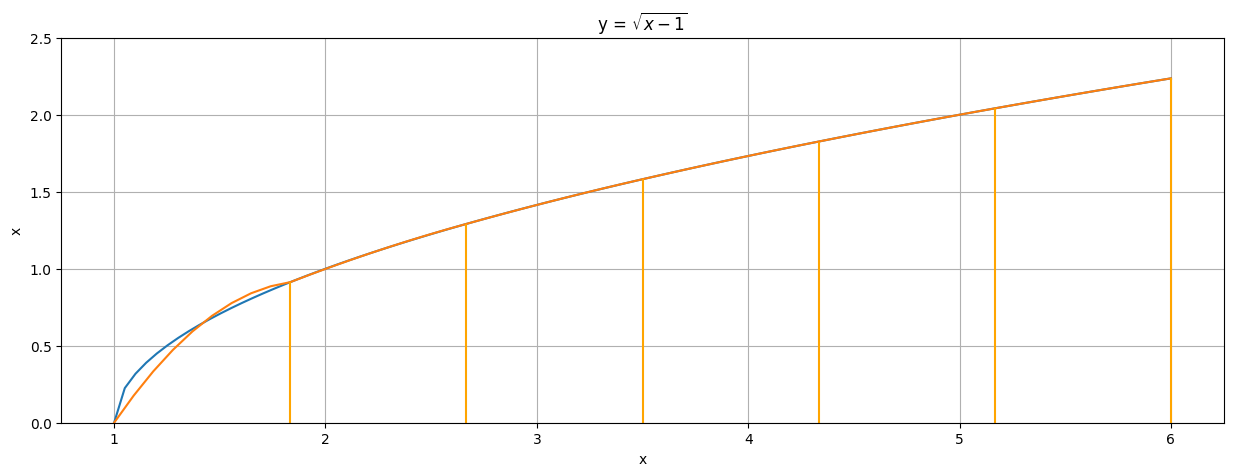

In [15]:
simplson_method_plot(6)

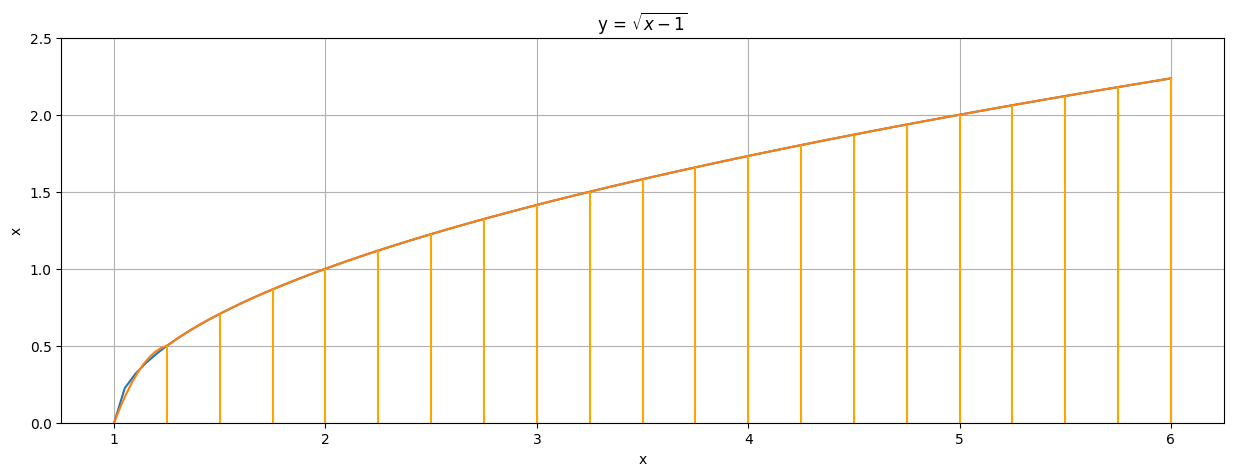

In [16]:
simplson_method_plot(20)

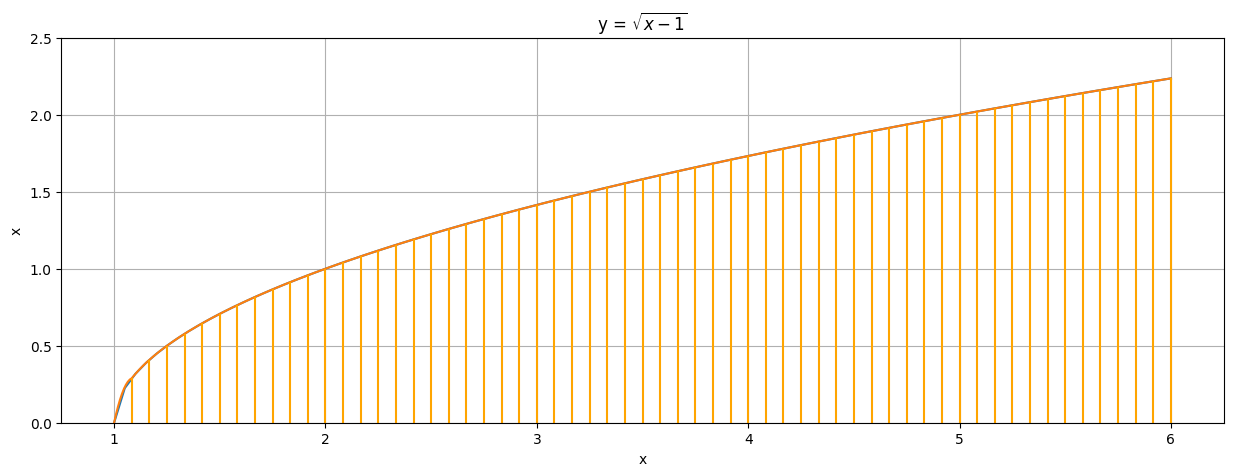

In [17]:
simplson_method_plot(60)

In [18]:
def simpson_integral(interval_count: int):
    x_points = np.linspace(1, 6, interval_count+1)
    f_x = lambda x: np.sqrt(x - 1)

    simpson_sq = lambda a, b: (b-a)/6 * (f_x(a) + 4*f_x((a+b)/2) + f_x(b))

    integral = 0
    for ix, x in enumerate(x_points[:-1]):
        integral += simpson_sq(x, x_points[ix+1])
    print(f"integral: {integral}")

In [19]:
simpson_integral(5)

integral: 7.424859132636582


In [20]:
simpson_integral(10)

integral: 7.443411992603202


In [21]:
simpson_integral(50)

integral: 7.452652253578306


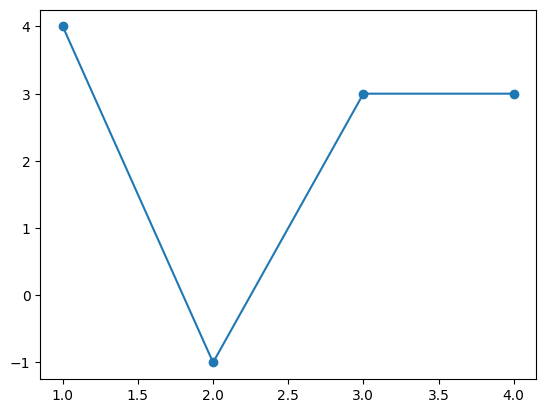

In [24]:
x = np.asarray([1, 2, 3, 4])
y = np.array([4, -1, 3, 3])
plt.plot(x, y)
plt.scatter(x, y)

In [ ]:
[

# Интерполяция

In [ ]:
x = np.array([1, 2, 4, 7, 9])
y = np.array([2, 3, 1, 4, 1.5])

plt.figure(figsize=(15, 5))
plt.grid()
plt.scatter(x, y)

Существует локальная и глобальная интерполяция
1. локальная - свое уравнение на каждом промежутке
2. глобальная - находим уравнение в целом

## Линейная интерполяция

# $\frac{y-y_0}{y_1 - y_0} = \frac{x-x_0}{x_1 - x_0}$

# $y = \frac{(y_1 - y_0) (x - x_0)}{x_1 - x_0} + y_0$

# $y = \frac{y_1 - y_0}{x_1 - x_0} x - \frac{y_1 - y_0}{x_1 - x_0}x_0 + y_0$ = $a x + b$

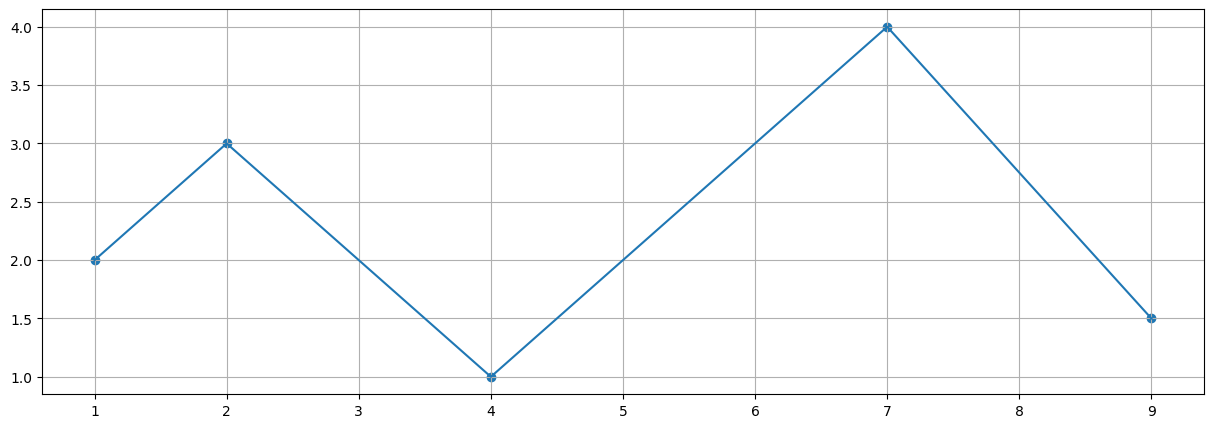

In [25]:
x = np.array([1, 2, 4, 7, 9])
y = np.array([2, 3, 1, 4, 1.5])

plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(x, y)
plt.scatter(x, y)

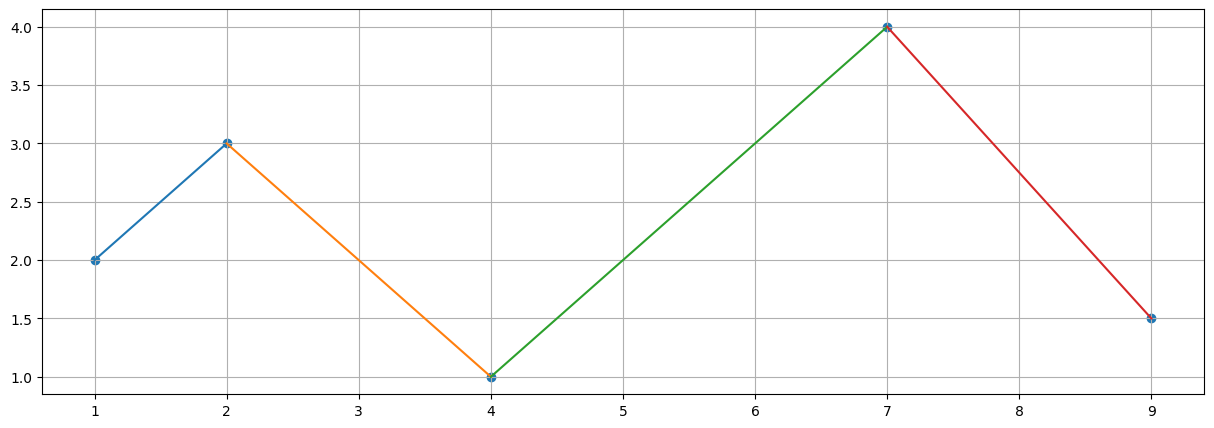

In [26]:
x = np.array([1, 2, 4, 7, 9])
y = np.array([2, 3, 1, 4, 1.5])

linear_coefs_f = lambda x0, x1, y0, y1: [(y1-y0)/(x1-x0), - (y1-y0)/(x1-x0) * x0 + y0]

interpolated_x = []
interpolated_y = []

for ix, (x_, y_) in enumerate(zip(x[:-1], y[:-1])):
    inter_x = np.linspace(x_, x[ix+1], 10)
    linear_coefs = linear_coefs_f(x_, x[ix+1], y_, y[ix+1])
    inter_y = np.vectorize(lambda x: linear_coefs[0]* x + linear_coefs[1])(inter_x)

    interpolated_x.append(inter_x)
    interpolated_y.append(inter_y)

plt.figure(figsize=(15, 5))
plt.grid()
plt.scatter(x, y)
for inter_x, inter_y in zip(interpolated_x, interpolated_y):
    plt.plot(inter_x, inter_y)

## Квадратичная интерполяция

In [27]:
def quadratic_interpolation_plot():
    x = np.array([1, 2, 4, 7, 9])
    y = np.array([2, 3, 1, 4, 1.5])

    parab_xs = []
    parab_ys = []

    for ix, (x_, y_) in enumerate(zip(x[:-2], y[:-2])):

        A = []
        Y = []

        mid = x[ix+1]

        A.append([x_**2, x_, 1])
        A.append([mid**2, mid, 1])
        A.append([x[ix+2]**2, x[ix+2], 1])
        Y = [y_, y[ix+1], y[ix+2]]

        A = np.asarray(A)
        Y = np.asarray(Y)

        parabola_coefs = np.linalg.solve(A, Y)
        
        parab_x = np.linspace(x_, x[ix+2], 10)
        parab_y = parabola_coefs[0]*parab_x**2 + parabola_coefs[1] * parab_x + parabola_coefs[2]

        parab_xs.append(parab_x)
        parab_ys.append(parab_y)

    x = np.array([1, 2, 4, 7, 9])
    y = np.array([2, 3, 1, 4, 1.5])

    plt.figure(figsize=(15, 5))
    plt.grid()
    plt.scatter(x, y)
    for el_x, el_y in zip(parab_xs, parab_ys):
        plt.plot(el_x, el_y)

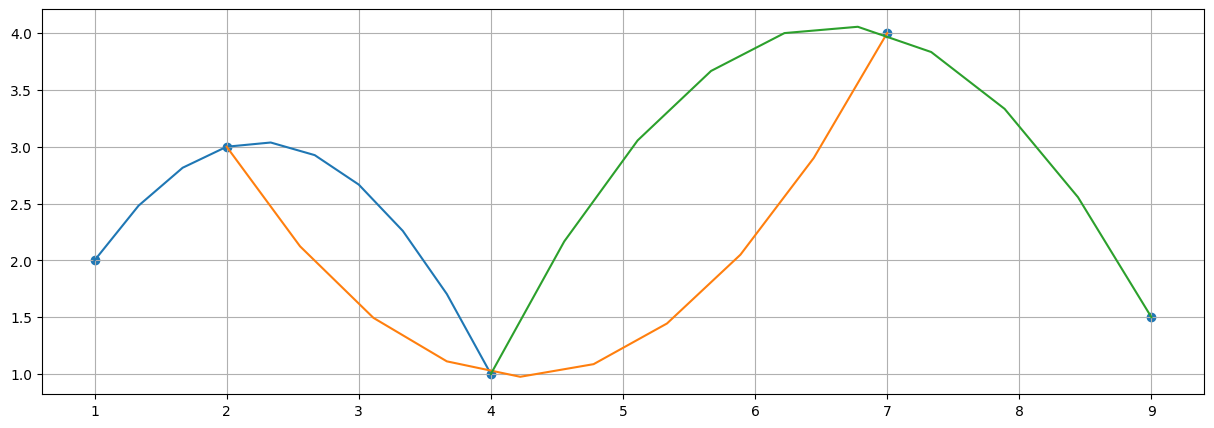

In [28]:
quadratic_interpolation_plot()

In [29]:
def quadratic_interpolation_plot():
    x = np.array([1, 2, 4, 7, 9])
    y = np.array([2, 3, 1, 4, 1.5])

    parab_xs = []
    parab_ys = []

    for ix, (x_, y_) in enumerate(zip(x[:-2], y[:-2])):

        A = []
        Y = []

        mid = x[ix+1]

        A.append([x_**2, x_, 1])
        A.append([mid**2, mid, 1])
        A.append([x[ix+2]**2, x[ix+2], 1])
        Y = [y_, y[ix+1], y[ix+2]]

        A = np.asarray(A)
        Y = np.asarray(Y)

        parabola_coefs = np.linalg.solve(A, Y)
        if ix == 0:
            parab_x = np.linspace(x_, x[ix+2], 10)
            parab_y = parabola_coefs[0]*parab_x**2 + parabola_coefs[1] * parab_x + parabola_coefs[2]
        else:
            parab_x = np.linspace(x[ix+1], x[ix+2], 10)
            parab_y = parabola_coefs[0]*parab_x**2 + parabola_coefs[1] * parab_x + parabola_coefs[2]

        parab_xs.append(parab_x)
        parab_ys.append(parab_y)

    x = np.array([1, 2, 4, 7, 9])
    y = np.array([2, 3, 1, 4, 1.5])

    plt.figure(figsize=(15, 5))
    plt.grid()
    plt.scatter(x, y)
    for el_x, el_y in zip(parab_xs, parab_ys):
        plt.plot(el_x, el_y)

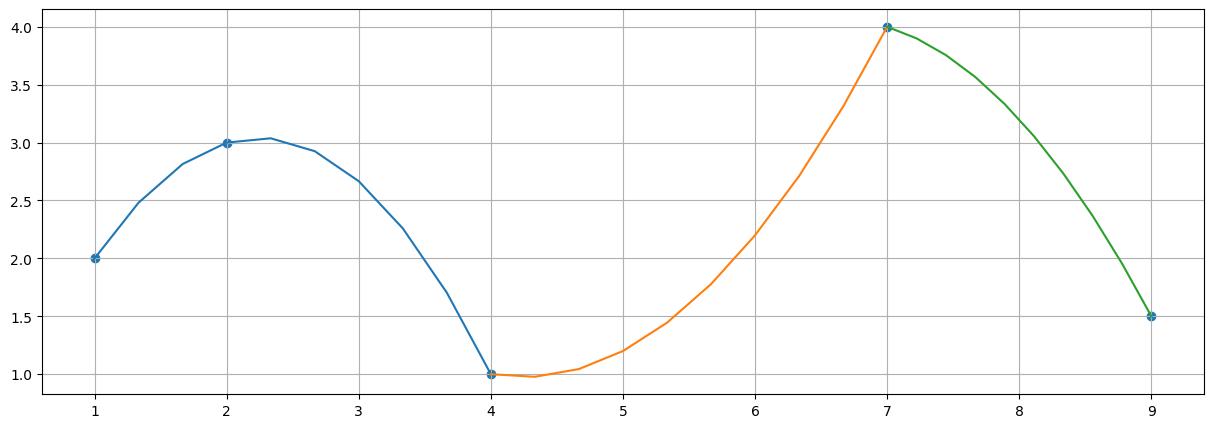

In [30]:
quadratic_interpolation_plot()

# Дифференциальное уравнение

<img src="./integral_diff_eq/1.png" alt="Alternative text" />

<img src="./integral_diff_eq/2.png" alt="Alternative text" />

<img src="./integral_diff_eq/3.png" alt="Alternative text" />

<img src="./integral_diff_eq/4.png" alt="Alternative text" />

<img src="./integral_diff_eq/5.png" alt="Alternative text" />

<img src="./integral_diff_eq/6.png" alt="Alternative text" />

<img src="./integral_diff_eq/7.png" alt="Alternative text" />

<img src="./integral_diff_eq/8.png" alt="Alternative text" />

# Задача Коши

# $\frac{dy}{dx} = f(x, y), \, y_0 = C$

# $\frac{dy}{dx} = x^2$

In [ ]:
xs = np.linspace(-10, 10, 100)
diff_f = xs**2

plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(xs, diff_f)

In [ ]:
xs = np.linspace(-10, 10, 100)
ys = 1/3 * xs**3

plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(xs, ys)

# Метод Эйлера

# $\frac{dy}{dx} = f(x, y), y_0 = C \rightarrow$

# $\frac{y_{i+1} - y_i}{x_{i+1} - x_i} = f(x_i,y_i) \rightarrow y_{i+1} - y_i = (x_{i+1} - x_i) f(x_i,y_i) \rightarrow y_{i+1} = y_i + (x_{i+1} - x_i) f(x_i,y_i)$

In [ ]:
xs = np.linspace(-10, 10, 100)
delta_x = np.abs(xs[0] - xs[1])
print(f"delta_x: {delta_x}")

euler_ys = [1/3 * xs[0]**3]
for ix, x in enumerate(xs[1:], start=1):
    new_y = euler_ys[-1] + delta_x * xs[ix-1]**2
    euler_ys.append(new_y)
    
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(xs, euler_ys)

# Метод Рунге - Кутты 2 порядка

# $\frac{y_{i+1} - y_i}{x_{i+1} - x_i} = f(x_i,y_i)$

# $\frac{y_{i+1} - y_i}{x_{i+1} - x_i} = \frac{1}{2}[f(x_i,y_i) + f(x_{i+1},y_{i+1})]$

# $\frac{y_{i+1} - y_i}{x_{i+1} - x_i} = \frac{1}{2}[f(x_i,y_i) + f(x_{i+1}, [y_i + (x_{i+1} - x_i) f(x_i,y_i)])]$


# $y_{i+1} = y_i + (x_{i+1} - x_i) \frac{1}{2}[f(x_i,y_i) + f(x_{i+1}, [y_i + (x_{i+1} - x_i) f(x_i,y_i)])]$

# $h = (x_{i+1} - x_i) $

# $y_{i+1} = y_i + \frac{h}{2}[f(x_i,y_i) + f(x_{i+1}, [y_i + h f(x_i,y_i)])]$

# $r_1 = hf(x_i,y_i)$
# $r_2 = f(x_{i+1}, y_i + r_1)$
# $y_{i+1} = y_i + \frac{1}{2}[r_1 + r_2]$

In [ ]:
xs = np.linspace(-10, 10, 100)
delta_x = np.abs(xs[0] - xs[1])
print(f"delta_x: {delta_x}")

def rk_2(f, h, xi, yi, xi_1):
    r1 = h * f(xi, yi)
    r2 = h * f(xi_1, yi+r1)
    return yi + 1/2*(r1 + r2)

rk_2_ys = [1/3 * xs[0]**3]
for ix, x in enumerate(xs[1:], start=1):
    new_y = rk_2(lambda x,y: x**2, delta_x, xs[ix-1], rk_2_ys[-1], x)
    rk_2_ys.append(new_y)
    
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(xs, rk_2_ys)

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.abs(np.array(ys) - np.array(euler_ys)))
plt.subplot(1,2,2)
plt.plot(np.abs(np.array(ys) - np.array(rk_2_ys)))